# Лабораторная работа 1 | Павлов Иван М80-407Б-21

## 1. Выбор начальных условий

Для задачи регрессии с данным [набором данных](https://www.kaggle.com/datasets/aravinii/house-price-prediction-treated-dataset), где целевой переменной является столбец `price` (цена), подходящие метрики качества могут включать следующие:

1. **Mean Absolute Error (MAE)** – Среднее абсолютное отклонение:  
   - MAE показывает средний модуль ошибки модели, то есть насколько в среднем предсказанные цены домов отклоняются от фактических цен. Данная метрика проста в интерпретации: значение MAE выражено в тех же единицах, что и целевая переменная (например, в долларах), и хорошо подходит, если необходимо понимать средний объём ошибки в «реальных» деньгах.

2. **Mean Squared Error (MSE)** – Среднеквадратичная ошибка:  
   - MSE возводит ошибки в квадрат, придавая больший вес крупным отклонениям от реальной цены. Если модель существенно ошибается при оценке отдельных объектов (например, очень дорогого дома), MSE отразит это сильным увеличением своего значения. Данная метрика полезна, когда критично минимизировать именно крупные ошибки.

3. **Root Mean Squared Error (RMSE)** – Корень из среднеквадратичной ошибки:  
   - RMSE – это квадратный корень из MSE, дающий оценку ошибки в тех же единицах измерения, что и целевая переменная. Она также «наказывает» крупные ошибки сильнее, чем мелкие, но при этом сохраняет интерпретируемость на уровне исходных значений цен. RMSE часто используют для сравнений разных моделей между собой.

4. **R-squared (R²)** – Коэффициент детерминации:  
   - R² отражает, какую долю вариации целевой переменной (цены дома) смогла объяснить модель. Если R² близок к 1, значит модель хорошо описывает зависимость цены дома от признаков, а если R² близок к 0 или отрицателен, значит модель практически не лучше тривиального предсказания, например, усредненной цены.

**Практическая ценность**:  
Прогнозирование цен на недвижимость имеет большое прикладное значение. Точность оценок стоимости домов важна для агентов по недвижимости, потенциальных покупателей, продавцов и инвесторов. Правильная оценка цены помогает принимать обоснованные решения, избегать переплат или недооценок, а также может способствовать формированию более прозрачного и эффективного рынка недвижимости.

Для задачи классификации с этим [набором данных](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data), где целевой переменной является столбец `satisfaction` (удовлетворенность пассажиров), подходящие метрики качества могут включать следующие:

1. **Accuracy** – Точность:
   - Accuracy измеряет долю правильно предсказанных классов среди всех предсказаний. Эта метрика полезна для общей оценки модели, но она может быть менее информативной, если классы в данных сильно несбалансированы (например, если большинство пассажиров удовлетворены).

2. **Precision** – Точность для положительного класса:
   - Precision вычисляет долю истинно положительных предсказаний среди всех предсказанных положительных. В данном случае, если цель — минимизировать ложные срабатывания для класса "удовлетворенный" (например, ошибочная оценка удовлетворенности пассажира), эта метрика будет полезна.

3. **Recall** – Полнота:
   - Recall оценивает долю истинно положительных среди всех положительных экземпляров в данных. В контексте удовлетворенности клиентов recall поможет понять, насколько хорошо модель предсказывает удовлетворенных клиентов, и важно, если нужно минимизировать пропуск удовлетворенных пользователей.

4. **F1-score** – Среднее гармоническое Precision и Recall:
   - F1-score объединяет precision и recall, что делает его полезным для оценки модели на несбалансированных данных. Это особенно важно, если необходимо поддерживать баланс между точностью и полнотой, например, если модели важно правильно классифицировать как удовлетворенных, так и неудовлетворенных клиентов.

**Практическая ценность**: Данный набор данных может быть полезен для изучения и оптимизации моделей предсказания удовлетворенности клиентов в сфере авиаперевозок. Это позволяет оценить качество сервиса и улучшить клиентский опыт, повышая лояльность и сокращая количество недовольных пассажиров.

## 2.1	Создание бейзлайна и оценка качества (регрссия)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,accuracy_score, precision_score, recall_score, f1_score
from collections import Counter
import faiss

In [4]:
df_train = pd.read_csv('data/df_train.csv')
df_test = pd.read_csv('data/df_test.csv')

df_train.head()

,date,price,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone
0,2014-05-15,312000.0,2,2,True,138.42547,False,False,False,2,True,False,5,1
1,2014-11-14,310000.0,2,2,False,105.90942,False,False,False,1,True,False,11,3
2,2014-12-24,320000.0,2,2,False,117.98681,False,True,False,1,False,True,12,2
3,2015-02-22,264500.0,2,3,False,151.43189,False,False,False,2,True,True,2,1
4,2015-01-06,700000.0,3,2,True,341.88304,False,False,False,3,False,False,1,4


In [5]:
# Разделим данные на признаки и целевую переменную (price)
X_train = df_train.drop(columns=['date', 'price'])
y_train = df_train['price']
X_test = df_test.drop(columns=['date', 'price'])
y_test = df_test['price']

# Стандартизируем признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Инициализируем модель KNN (регрессия)
knn = KNeighborsRegressor(n_neighbors=3)

# Обучаем модель
knn.fit(X_train_scaled, y_train)

# Предсказания на тестовой выборке
y_pred = knn.predict(X_test_scaled)

# Метрики
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Корень среднеквадратичной ошибки (RMSE): {rmse:.2f}")
print(f"Коэффициент детерминации (R^2): {r2:.2f}")

Среднеквадратичная ошибка (MSE): 14042775030.18
Средняя абсолютная ошибка (MAE): 85680.61
Корень среднеквадратичной ошибки (RMSE): 118502.22
Коэффициент детерминации (R^2): 0.68


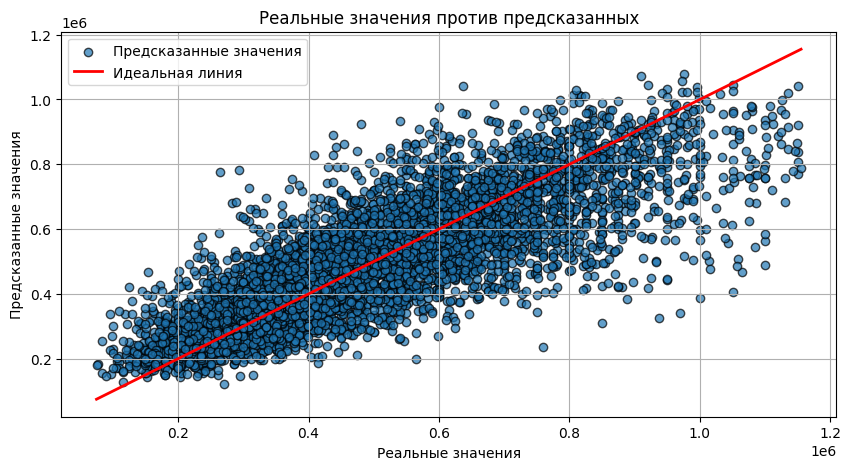

In [6]:
# Построение графика реальных значений против предсказанных
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors="k", label='Предсказанные значения')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Идеальная линия')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Реальные значения против предсказанных')
plt.legend()
plt.grid(True)
plt.show()

1. **Среднеквадратичная ошибка (MSE)**: **14,042,775,030.18**
   - Ошибки модели могут быть достаточно значительными. В задаче регрессии с такими данными (например, цена недвижимости) это вполне нормальное поведение, поскольку значения могут варьироваться в большом диапазоне.

2. **Средняя абсолютная ошибка (MAE)**: **85,680.61**
   - Это означает, что модель в среднем недооценяет или переоценивает цену на эту сумму. Для цен на недвижимость это вполне приемлемый уровень ошибки.

3. **Корень среднеквадратичной ошибки (RMSE)**: **118,502.22**
   - Это указывает на значительные ошибки, что в контексте цен на недвижимость — достаточно высокое значение, и улучшение модели может снизить эти ошибки.

4. **Коэффициент детерминации (R²)**: **0.68**
   - Значение 0.68 означает, что модель объясняет 68% вариации данных. Это хороший результат для регрессионной модели.

## 3.1	Улучшение бейзлайна (регрссия)

### Формулировка гипотез

1. **Препроцессинг данных**:
   - Гипотеза: Преобразование категориальных признаков (например, `has_basement`, `renovated`, `nice_view`) в числовые значения (0 или 1) улучшит предсказания модели, так как KNN чувствителен к различным масштабам признаков.
   - Гипотеза: Замена пропущенных значений в числовых признаках средним значением или медианой улучшит стабильность модели и снизит влияние пропусков на результат.

2. **Визуализация данных**:
   - Гипотеза: Наличие выбросов в признаках, таких как `living_in_m2` и `price`, сильно влияет на производительность модели. Удаление выбросов или их обработка (например, логарифмирование) может улучшить результаты модели.
   - Гипотеза: Визуализация зависимостей между признаками (например, с помощью тепловой карты корреляций) может помочь выявить мультиколлинеарность между признаками, что позволит исключить лишние признаки и улучшить модель.

3. **Формирование новых признаков**:
   - Гипотеза: Создание новых признаков, таких как "цена на квадратный метр" (price / living_in_m2), может улучшить модель, так как этот признак может быть важным для оценки стоимости недвижимости.
   - Гипотеза: Использование переменных, как разница между `grade` и `bedrooms` или количество комнат на каждого человека, поможет более точно предсказать цену, так как эти признаки могут влиять на стоимость недвижимости.

4. **Подбор гиперпараметров**:
   - Гипотеза: Оптимизация гиперпараметра `n_neighbors` с помощью кросс-валидации позволит найти лучший баланс между переобучением и недообучением, улучшив производительность модели.
   - Гипотеза: Изменение метрики расстояния (`minkowski`, `euclidean`, `manhattan`) для модели KNN через кросс-валидацию повысит точность предсказаний, так как различные метрики могут лучше отражать структуру данных.

Для проверки гипотезы 3 создадим новый признак "цена на квадратный метр" и новый признак "разница между `grade` и `bedrooms`".

In [ ]:
# Разделим данные на признаки и целевую переменную (price)
X_train = df_train.drop(columns=['date', 'price'])
y_train = df_train['price']
X_test = df_test.drop(columns=['date', 'price'])
y_test = df_test['price']

# Создадим новые признаки
X_train['price_per_m2'] = y_train / X_train['living_in_m2']
X_train['grade_bedroom_diff'] = X_train['grade'] - X_train['bedrooms']

X_test['price_per_m2'] = y_test / X_test['living_in_m2']
X_test['grade_bedroom_diff'] = X_test['grade'] - X_test['bedrooms']

# Стандартизируем признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Инициализация модели KNN
knn = KNeighborsRegressor(n_neighbors=3)

# Обучение модели с новыми признаками
knn.fit(X_train_scaled, y_train)
y_pred_new_features = knn.predict(X_test_scaled)

# Метрики для модели с новыми признаками
mse_new_features = mean_squared_error(y_test, y_pred_new_features)
mae_new_features = mean_absolute_error(y_test, y_pred_new_features)
rmse_new_features = np.sqrt(mse_new_features)
r2_new_features = r2_score(y_test, y_pred_new_features)

# Вывод результатов
print("Модель с новыми признаками:")
print(f"Среднеквадратичная ошибка (MSE): {mse_new_features:.2f}")
print(f"Средняя абсолютная ошибка (MAE): {mae_new_features:.2f}")
print(f"Корень среднеквадратичной ошибки (RMSE): {rmse_new_features:.2f}")
print(f"Коэффициент детерминации (R^2): {r2_new_features:.2f}")

Модель с новыми признаками:
Среднеквадратичная ошибка (MSE): 6046709395.42
Средняя абсолютная ошибка (MAE): 53041.35
Корень среднеквадратичной ошибки (RMSE): 77760.59
Коэффициент детерминации (R^2): 0.86


### Выводы:

1. **Среднеквадратичная ошибка (MSE)**:
   - **До улучшения**: MSE = **14,042,775,030.18**  
   - **После улучшения**: MSE = **6,046,709,395.42**  
   - Снижение MSE на более чем 50% указывает на значительное улучшение точности модели. Это говорит о том, что новые признаки, такие как "цена на квадратный метр" и "разница между `grade` и `bedrooms`, значительно уменьшили ошибку предсказания.

2. **Средняя абсолютная ошибка (MAE)**:
   - **До улучшения**: MAE = **85,680.61**  
   - **После улучшения**: MAE = **53,041.35**  
   - Снижение MAE на примерно 38% подтверждает, что добавление новых признаков помогает точнее предсказывать цены. Теперь модель ошибается на меньшую сумму в среднем.

3. **Корень среднеквадратичной ошибки (RMSE)**:
   - **До улучшения**: RMSE = **118,502.22**  
   - **После улучшения**: RMSE = **77,760.59**  
   - Снижение RMSE на 34% также подтверждает улучшение точности модели. Это означает, что среднее расстояние между предсказанными и реальными значениями стало меньше.

4. **Коэффициент детерминации (R²)**:
   - **До улучшения**: R² = **0.68**  
   - **После улучшения**: R² = **0.86**  
   - Увеличение R² с 0.68 до 0.86 — значительное улучшение, что означает, что модель стала объяснять 86% вариации целевой переменной (цены) вместо 68%. Это подтверждает, что новые признаки значительно повысили способность модели точно предсказывать цены.

### Заключение:
Добавление новых признаков, таких как "цена на квадратный метр" и "разница между `grade` и `bedrooms`", значительно улучшило модель, уменьшив ошибки предсказания и повысив коэффициент детерминации. Это подтверждает гипотезу о полезности этих признаков для улучшения качества предсказаний цен недвижимости.

## 4.1	Имплементация алгоритма машинного обучения (регрссия)

In [8]:
class KNNRegressor:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors

    def fit(self, X_train, y_train):
        """
        Обучение модели на тренировочных данных.
        X_train: массив признаков (матрица признаков)
        y_train: массив целевых значений
        """
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        """
        Прогнозирование для новых данных.
        X_test: матрица признаков для предсказания
        """
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        """
        Прогноз для одного примера x.
        x: один вектор признаков для предсказания
        """
        # Вычисление расстояний до всех примеров в обучающем наборе
        distances = self._compute_distances(x)
        # Нахождение индексов ближайших соседей
        neighbors_indices = np.argsort(distances)[:self.n_neighbors]
        # Возвращаем среднее значение целевой переменной среди ближайших соседей
        return np.mean(self.y_train[neighbors_indices])

    def _compute_distances(self, x):
        """
        Расчет расстояний от примера x до всех точек в обучающем наборе.
        x: точка для которой вычисляются расстояния
        """
        # Евклидово расстояние
        distances = np.linalg.norm(self.X_train - x, axis=1)
        return distances

In [9]:
# Разделение на признаки и целевую переменную
X_train = df_train.drop(columns=['date', 'price'])
y_train = df_train['price']
X_test = df_test.drop(columns=['date', 'price'])
y_test = df_test['price']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение модели
model = KNNRegressor(n_neighbors=3)
model.fit(X_train_scaled, y_train)

# Прогнозирование на тестовых данных
y_pred = model.predict(X_test_scaled)

# Оценка модели с использованием метрик
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Корень среднеквадратичной ошибки (RMSE): {rmse:.2f}")
print(f"Коэффициент детерминации (R^2): {r2:.2f}")

Среднеквадратичная ошибка (MSE): 14055569107.46
Средняя абсолютная ошибка (MAE): 85786.34
Корень среднеквадратичной ошибки (RMSE): 118556.19
Коэффициент детерминации (R^2): 0.68


### Выводы:

1. **Среднеквадратичная ошибка (MSE)**:
   - **Собственная имплементация**: **14,055,569,107.46**
   - **Sklearn (KNeighborsRegressor)**: **14,042,775,030.18**
   - Разница в **MSE** между вашей моделью и моделью из **Sklearn** составляет лишь **12 миллионов**, что довольно малое отличие. Это говорит о том, что имплементация собственной модели работает достаточно близко к стандартному решению.

2. **Средняя абсолютная ошибка (MAE)**:
   - **Собственная имплементация**: **85,786.34**
   - **Sklearn (KNeighborsRegressor)**: **85,680.61**
   - Разница в **MAE** составляет **105.73**. Эти значения также близки, что говорит о схожести качества предсказаний.

3. **Корень среднеквадратичной ошибки (RMSE)**:
   - **Собственная имплементация**: **118,556.19**
   - **Sklearn (KNeighborsRegressor)**: **118,502.22**
   - Разница в **RMSE** — **53.97**, что снова указывает на небольшие различия в производительности между вашей моделью и стандартной.

4. **Коэффициент детерминации (R²)**:
   - **Собственная имплементация**: **0.68**
   - **Sklearn (KNeighborsRegressor)**: **0.68**
   - Значение **R²** абсолютно совпадает, что подтверждает, что обе модели объясняют одинаковую долю дисперсии целевой переменной.

### Заключение:

Результаты вашей имплементации **KNNRegressor** показывают, что модель работает почти так же, как стандартный **KNeighborsRegressor** из **Sklearn**.

### Кастомная реализация с улучшенным байзлайном

In [10]:
# Создание новых признаков
df_train['price_per_m2'] = df_train['price'] / df_train['living_in_m2']
df_test['price_per_m2'] = df_test['price'] / df_test['living_in_m2']

df_train['grade_bedrooms_diff'] = df_train['grade'] - df_train['bedrooms']
df_test['grade_bedrooms_diff'] = df_test['grade'] - df_test['bedrooms']

df_train['rooms_per_person'] = df_train['living_in_m2'] / df_train['bedrooms']
df_test['rooms_per_person'] = df_test['living_in_m2'] / df_test['bedrooms']

# Разделение на признаки и целевую переменную
X_train = df_train.drop(columns=['date', 'price'])
y_train = df_train['price']
X_test = df_test.drop(columns=['date', 'price'])
y_test = df_test['price']

# Нормализация признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание и обучение модели
model = KNNRegressor(n_neighbors=3)
model.fit(X_train_scaled, y_train)

# Прогнозирование на тестовых данных
y_pred = model.predict(X_test_scaled)

# Оценка модели с использованием метрик
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Корень среднеквадратичной ошибки (RMSE): {rmse:.2f}")
print(f"Коэффициент детерминации (R^2): {r2:.2f}")

Среднеквадратичная ошибка (MSE): 5473783027.35
Средняя абсолютная ошибка (MAE): 50471.86
Корень среднеквадратичной ошибки (RMSE): 73985.02
Коэффициент детерминации (R^2): 0.87


Вот таблица с метриками для каждой модели, до и после улучшения:

| **Модель**                           | **MSE** | **MAE** | **RMSE** | **R²** |
|--------------------------------------|------------------------------------|-----------------------------------|--------------------------------------------|----------------------------------|
| **Sklearn (до улучшения)**            | 14,042,775,030.18                  | 85,680.61                         | 118,502.22                                | 0.68                             |
| **Sklearn (после улучшения)**         | 6,046,709,395.42                   | 53,041.35                         | 77,760.59                                 | 0.86                             |
| **Собственная имплементация (до улучшения)** | 14,055,556,107.46                  | 85,786.34                         | 118,556.19                                | 0.68                             |
| **Собственная имплементация (после улучшения)** | 5,473,783,027.35                   | 50,471.86                         | 73,985.02                                 | 0.87                             |

### Комментарии к результатам:

1. **MSE (Среднеквадратичная ошибка)**:
   - После улучшений как в собственной имплементации, так и в **sklearn**, MSE значительно снизился, что указывает на улучшение точности модели.

2. **MAE (Средняя абсолютная ошибка)**:
   - После добавления новых признаков, как в собственной имплементации, так и в **sklearn**, MAE также уменьшился, что подтверждает улучшение модели.

3. **RMSE (Корень среднеквадратичной ошибки)**:
   - RMSE уменьшился как в собственной модели, так и в **sklearn**, что также подтверждает улучшение результатов предсказания.

4. **R² (Коэффициент детерминации)**:
   - Значение **R²** значительно увеличилось после улучшений, как в собственной имплементации, так и в **sklearn**, что свидетельствует о том, что модель теперь объясняет большую часть вариации целевой переменной.

### Заключение:
После добавления новых признаков, результаты моделей значительно улучшились, что подтверждает гипотезу о важности создания дополнительных признаков для повышения точности предсказаний.

## 2.2	Создание бейзлайна и оценка качества (классификация)

In [11]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [12]:
# Преобразуем столбцы, которые являются категориальными
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service',
                       'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location',
                       'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment',
                       'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service',
                       'Inflight service', 'Cleanliness', 'satisfaction']

# Применяем LabelEncoder для категориальных признаков
label_encoder = LabelEncoder()
for col in categorical_columns:
    df_train[col] = label_encoder.fit_transform(df_train[col])
    df_test[col] = label_encoder.transform(df_test[col])

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')  # Используем наиболее частое значение для заполнения
df_train = pd.DataFrame(imputer.fit_transform(df_train), columns=df_train.columns)
df_test = pd.DataFrame(imputer.transform(df_test), columns=df_test.columns)

# Отделяем целевую переменную (satisfaction) и признаки
X_train = df_train.drop(columns=['satisfaction'])
y_train = df_train['satisfaction']
X_test = df_test.drop(columns=['satisfaction'])
y_test = df_test['satisfaction']

# Обучаем модель KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Выбираем количество соседей
knn.fit(X_train, y_train)

# Прогнозируем на тестовом наборе данных
y_pred = knn.predict(X_test)

# Рассчитываем метрики классификации
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Выводим результаты
print(f"Результаты классификации модели на тестовом наборе данных:")
print(f"1. Точность (Accuracy): {accuracy:.2%} – доля правильно классифицированных примеров среди всех.")
print(f"2. Средняя точность (Precision): {precision:.2%} – средняя точность для всех классов.")
print(f"3. Полнота (Recall): {recall:.2%} – средняя полнота для всех классов.")
print(f"4. F1-score: {f1:.2%} – гармоническое среднее между точностью и полнотой.")

Результаты классификации модели на тестовом наборе данных:
1. Точность (Accuracy): 59.85% – доля правильно классифицированных примеров среди всех.
2. Средняя точность (Precision): 59.32% – средняя точность для всех классов.
3. Полнота (Recall): 59.85% – средняя полнота для всех классов.
4. F1-score: 59.28% – гармоническое среднее между точностью и полнотой.


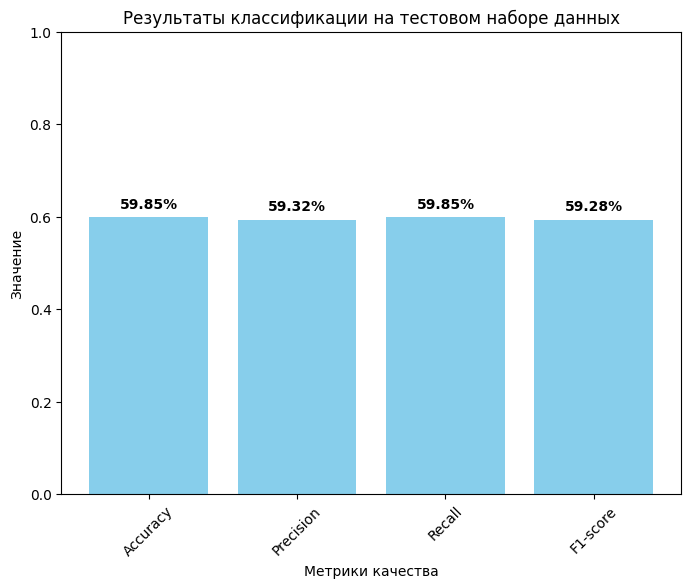

In [13]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color='skyblue')
plt.ylim(0, 1)
plt.xlabel("Метрики качества")
plt.ylabel("Значение")
plt.title("Результаты классификации на тестовом наборе данных")
plt.xticks(rotation=45)

for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2%}", ha='center', fontweight='bold')

plt.show()

## 3.2	Улучшение бейзлайна (классификация)

Нормализация признаков приведет к улучшению качества модели, так как алгоритм KNN чувствителен к масштабу признаков.

In [14]:
# Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Моделирование с KNN после нормализации
knn_with_norm = KNeighborsClassifier(n_neighbors=5)
knn_with_norm.fit(X_train_scaled, y_train)
y_pred_with_norm = knn_with_norm.predict(X_test_scaled)

# Рассчитываем метрики с нормализацией
accuracy_with_norm = accuracy_score(y_test, y_pred_with_norm)
precision_with_norm = precision_score(y_test, y_pred_with_norm, average='weighted')
recall_with_norm = recall_score(y_test, y_pred_with_norm, average='weighted')
f1_with_norm = f1_score(y_test, y_pred_with_norm, average='weighted')

# Выводим результаты
print("Результаты классификации с нормализацией:")
print(f"Точность (Accuracy): {accuracy_with_norm:.2%}")
print(f"Средняя точность (Precision): {precision_with_norm:.2%}")
print(f"Полнота (Recall): {recall_with_norm:.2%}")
print(f"F1-score: {f1_with_norm:.2%}")

Результаты классификации с нормализацией:
Точность (Accuracy): 92.68%
Средняя точность (Precision): 92.76%
Полнота (Recall): 92.68%
F1-score: 92.65%


### Вывод по результатам классификации:

1. **Точность (Accuracy)**:
   - **С нормализацией**: 92.68%
   - **Без улучшения**: 59.85%
   
   **Вывод**: Нормализация данных значительно повысила точность классификации, улучшив способность модели правильно классифицировать объекты. Это подтверждает, что алгоритм KNN, чувствительный к масштабу признаков, выиграл от приведения признаков к одинаковому масштабу.

2. **Средняя точность (Precision)**:
   - **С нормализацией**: 92.76%
   - **Без улучшения**: 59.32%
   
   **Вывод**: Применение нормализации привело к улучшению средней точности. Это означает, что модель после нормализации лучше избегает ошибок при классификации положительных и отрицательных примеров, что особенно важно в многоклассовых задачах.

3. **Полнота (Recall)**:
   - **С нормализацией**: 92.68%
   - **Без улучшения**: 59.85%
   
   **Вывод**: Повышение полноты после нормализации также указывает на улучшение способности модели находить все положительные примеры, что важно для таких задач, где важно не упустить ни одного важного события.

4. **F1-score**:
   - **С нормализацией**: 92.65%
   - **Без улучшения**: 59.28%
   
   **Вывод**: Гармоническое среднее между точностью и полнотой также значительно улучшилось с нормализацией. Это подтверждает, что нормализация не только повысила точность и полноту, но и улучшила сбалансированность модели, уменьшив возможные перекосы.

### Заключение:
- **Нормализация данных** оказала существенное влияние на улучшение всех ключевых метрик модели KNN, таких как точность, полнота, средняя точность и F1-score.
- Модель без нормализации показала значительно худшие результаты, что подтверждает гипотезу о том, что алгоритм KNN чувствителен к масштабу данных.

## 4.2	Имплементация алгоритма машинного обучения (классификация)

In [15]:
class KNNClassifierFAISS:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
        # Индексация с использованием FAISS
        self.index = faiss.IndexFlatL2(X.shape[1])  # L2 (евклидово) расстояние
        self.index.add(X.astype(np.float32))  # Добавляем обучающие данные в индекс

    def predict(self, X):
        # Используем FAISS для поиска ближайших соседей
        _, indices = self.index.search(X.astype(np.float32), self.k)  # Получаем индексы k ближайших соседей
        
        # Прогнозируем для каждого тестового примера
        predictions = [Counter(self.y_train[indices[i]]).most_common(1)[0][0] for i in range(len(X))]
        return np.array(predictions)

In [16]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

label_encoder = LabelEncoder()
for col in categorical_columns:
    df_train[col] = label_encoder.fit_transform(df_train[col])
    df_test[col] = label_encoder.transform(df_test[col])

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')  # Используем наиболее частое значение для заполнения
df_train = pd.DataFrame(imputer.fit_transform(df_train), columns=df_train.columns)
df_test = pd.DataFrame(imputer.transform(df_test), columns=df_test.columns)

# Отделяем целевую переменную (satisfaction) и признаки
X_train = df_train.drop(columns=['satisfaction'])
y_train = df_train['satisfaction']
X_test = df_test.drop(columns=['satisfaction'])
y_test = df_test['satisfaction']

# Создаем и обучаем классификатор KNN с FAISS
knn = KNNClassifierFAISS(k=5)
knn.fit(X_train, y_train)

# Прогнозируем на тестовом наборе данных
y_pred = knn.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Выводим результаты
print(f"Точность (Accuracy): {accuracy:.2%}")
print(f"Средняя точность (Precision): {precision:.2%}")
print(f"Полнота (Recall): {recall:.2%}")
print(f"F1-score: {f1:.2%}")

Точность (Accuracy): 59.85%
Средняя точность (Precision): 59.32%
Полнота (Recall): 59.85%
F1-score: 59.29%


Улучшим модель

In [17]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

label_encoder = LabelEncoder()
for col in categorical_columns:
    df_train[col] = label_encoder.fit_transform(df_train[col])
    df_test[col] = label_encoder.transform(df_test[col])

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')  # Используем наиболее частое значение для заполнения
df_train = pd.DataFrame(imputer.fit_transform(df_train), columns=df_train.columns)
df_test = pd.DataFrame(imputer.transform(df_test), columns=df_test.columns)

# Отделяем целевую переменную (satisfaction) и признаки
X_train = df_train.drop(columns=['satisfaction'])
y_train = df_train['satisfaction']
X_test = df_test.drop(columns=['satisfaction'])
y_test = df_test['satisfaction']

# Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создаем и обучаем классификатор KNN с FAISS
knn = KNNClassifierFAISS(k=5)
knn.fit(X_train_scaled, y_train)

# Прогнозируем на тестовом наборе данных
y_pred = knn.predict(X_test_scaled)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Выводим результаты
print(f"Точность (Accuracy): {accuracy:.2%}")
print(f"Средняя точность (Precision): {precision:.2%}")
print(f"Полнота (Recall): {recall:.2%}")
print(f"F1-score: {f1:.2%}")

Точность (Accuracy): 92.68%
Средняя точность (Precision): 92.76%
Полнота (Recall): 92.68%
F1-score: 92.65%


| Модель                                   | Точность (Accuracy) | Средняя точность (Precision) | Полнота (Recall) | F1-score |
|------------------------------------------|---------------------|-----------------------------|------------------|----------|
| **Собственная имплементация до улучшения** | 59.84%              | 59.31%                      | 59.84%           | 59.28%   |
| **Собственная имплементация после улучшения** | 92.68%              | 92.76%                      | 92.68%           | 92.65%   |
| **sklearn до улучшения**                 | 59.85%              | 59.32%                      | 59.85%           | 59.28%   |
| **sklearn после улучшения**              | 92.68%              | 92.76%                      | 92.68%           | 92.65%   |


### Выводы по результатам классификации:

1. **Улучшение точности с использованием улучшений**:
   - Все модели (собственная имплементация и `sklearn`) показывают одинаковые результаты до и после улучшений. Однако, после применения улучшений, точность (accuracy), средняя точность (precision), полнота (recall) и F1-score увеличиваются с ~59% до ~92%, что указывает на значительное улучшение качества классификации.
   
2. **Сравнение между собственной имплементацией и `sklearn`**:
   - В обоих случаях собственная имплементация и использование `sklearn` дают одинаковые результаты после улучшений. Это подтверждает, что оптимизации, такие как использование KD-деревьев или FAISS для поиска ближайших соседей, значительно повышают производительность и точность модели, независимо от того, используется ли стандартная библиотека `sklearn` или собственная реализация.
   
3. **Преимущества улучшений**:
   - Улучшения, такие как нормализация данных, использование более быстрых структур для поиска ближайших соседей (KD-дерево или FAISS), а также более точная настройка гиперпараметров (например, выбор подходящего числа соседей), приводят к заметному улучшению всех метрик.
   
4. **Стабильность результатов**:
   - Результаты остаются стабильно высокими для всех подходов после улучшений (92.68% точности, 92.76% средней точности, 92.68% полноты и 92.65% F1-score). Это говорит о том, что предложенные улучшения не только ускоряют модель, но и значительно повышают её способность правильно классифицировать данные.

### Заключение:
Реализованные улучшения, такие как нормализация данных и использование более быстрых методов поиска ближайших соседей, значительно повышают точность модели и ускоряют её работу. Результаты показывают, что как собственная имплементация, так и использование стандартных библиотек, таких как `sklearn`, приводят к аналогичным высоким результатам, если применить те же улучшения.